In [5]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('train_data.csv')
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [7]:
from sklearn.model_selection import train_test_split

x = df_train.drop('Stay', axis=1)
y = df_train['Stay']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (254750, 17)
y_train shape: (254750,)
X_test shape: (63688, 17)
y_test shape: (63688,)


**EDA**

In [9]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254750 entries, 231676 to 121958
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            254750 non-null  int64  
 1   Hospital_code                      254750 non-null  int64  
 2   Hospital_type_code                 254750 non-null  object 
 3   City_Code_Hospital                 254750 non-null  int64  
 4   Hospital_region_code               254750 non-null  object 
 5   Available Extra Rooms in Hospital  254750 non-null  int64  
 6   Department                         254750 non-null  object 
 7   Ward_Type                          254750 non-null  object 
 8   Ward_Facility_Code                 254750 non-null  object 
 9   Bed Grade                          254656 non-null  float64
 10  patientid                          254750 non-null  int64  
 11  City_Code_Patient                  2510

In [10]:
x_train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,254750.000000,254750.000000,254750.000000,254750.000000,254656.000000,254750.000000,251096.000000,254750.000000,254750.000000
mean,159257.100919,18.313252,4.772620,3.197766,2.626154,65756.588035,7.240402,3.284836,4879.660043
std,91943.046558,8.631398,3.104076,1.169690,0.872845,37956.994011,4.728393,1.765235,1086.938886
min,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1801.000000
25%,79611.750000,11.000000,2.000000,2.000000,2.000000,32900.250000,4.000000,2.000000,4185.000000
50%,159248.500000,19.000000,5.000000,3.000000,3.000000,65743.000000,8.000000,3.000000,4739.000000
75%,238877.750000,26.000000,7.000000,4.000000,3.000000,98429.000000,8.000000,4.000000,5408.000000
max,318437.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [11]:
x_train.duplicated().sum()

np.int64(0)

In [12]:
x_train.isnull().sum()

,0
case_id,0
Hospital_code,0
Hospital_type_code,0
City_Code_Hospital,0
Hospital_region_code,0
Available Extra Rooms in Hospital,0
Department,0
Ward_Type,0
Ward_Facility_Code,0
Bed Grade,94


In [13]:
x_test.isnull().sum()

,0
case_id,0
Hospital_code,0
Hospital_type_code,0
City_Code_Hospital,0
Hospital_region_code,0
Available Extra Rooms in Hospital,0
Department,0
Ward_Type,0
Ward_Facility_Code,0
Bed Grade,19


<ipython-input-14-994580c58ef1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Admission_Deposit'])


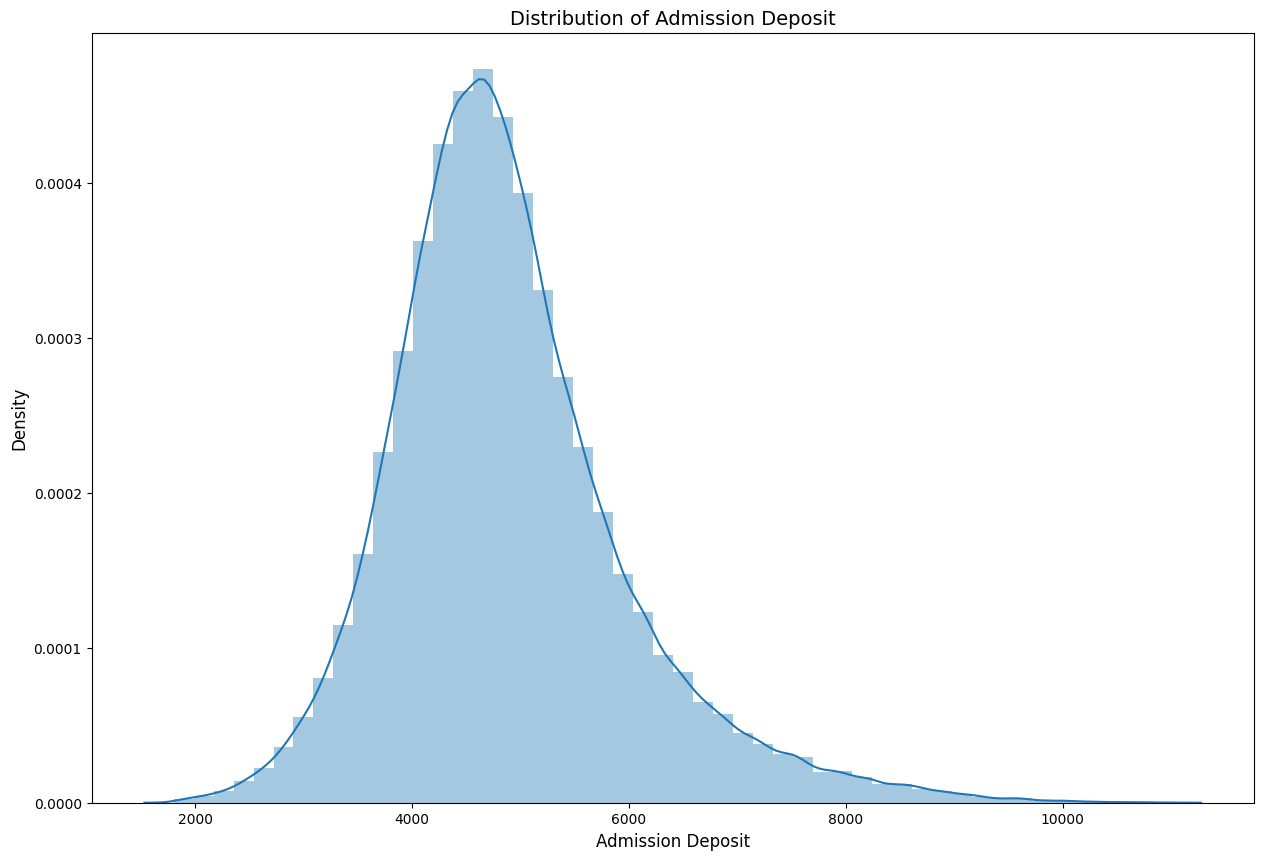

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'x_train'

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the distribution plot
sns.distplot(x_train['Admission_Deposit'])

# Set chart title
plt.title('Distribution of Admission Deposit', fontsize=14)

# Set x-axis label
plt.xlabel('Admission Deposit', fontsize=12)

# Set y-axis label
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

<ipython-input-15-75ebb79777a0>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Visitors with Patient'], color='orange')


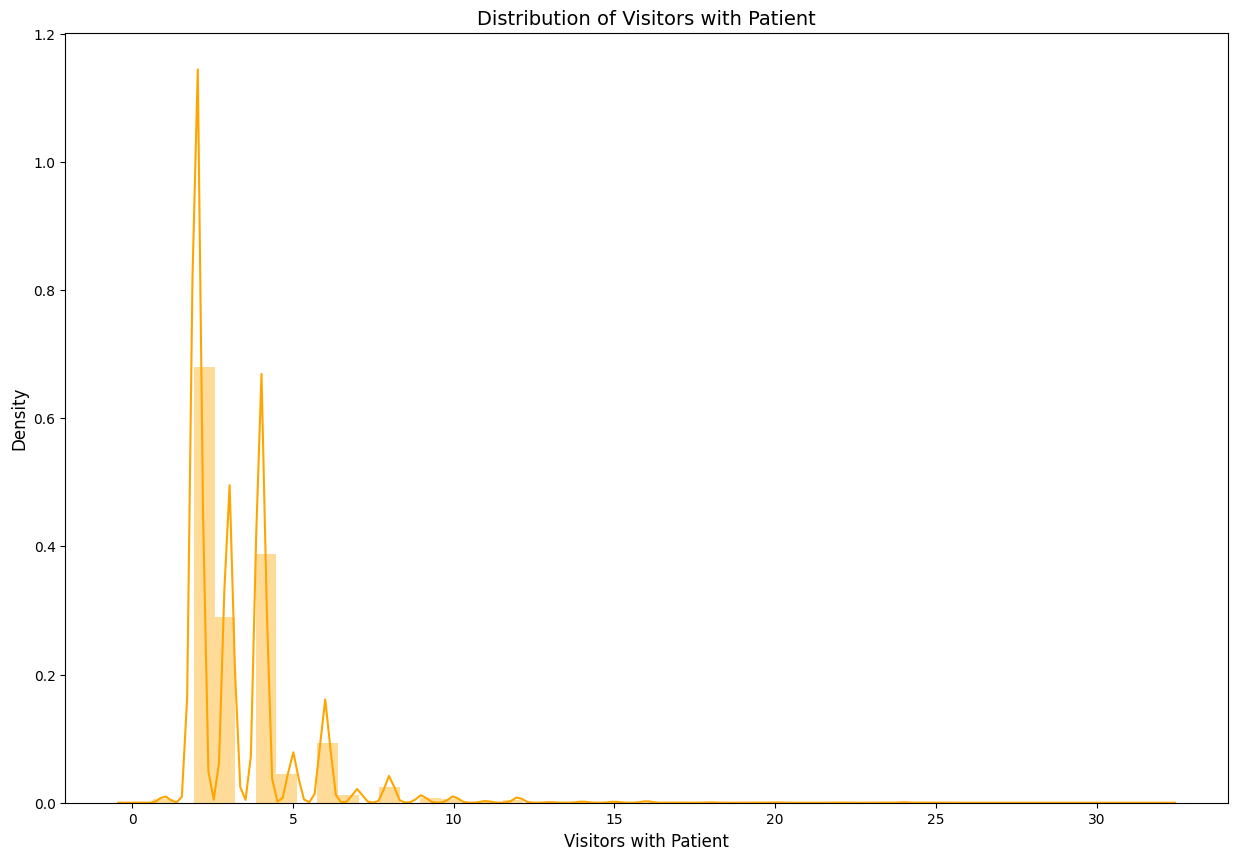

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'x_train'

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the distribution plot
sns.distplot(x_train['Visitors with Patient'], color='orange')

# Set chart title
plt.title('Distribution of Visitors with Patient', fontsize=14)

# Set x-axis label
plt.xlabel('Visitors with Patient', fontsize=12)

# Set y-axis label
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

<ipython-input-16-314a2357422a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_train['Age'].sort_values(), data=x_train, palette='rocket')


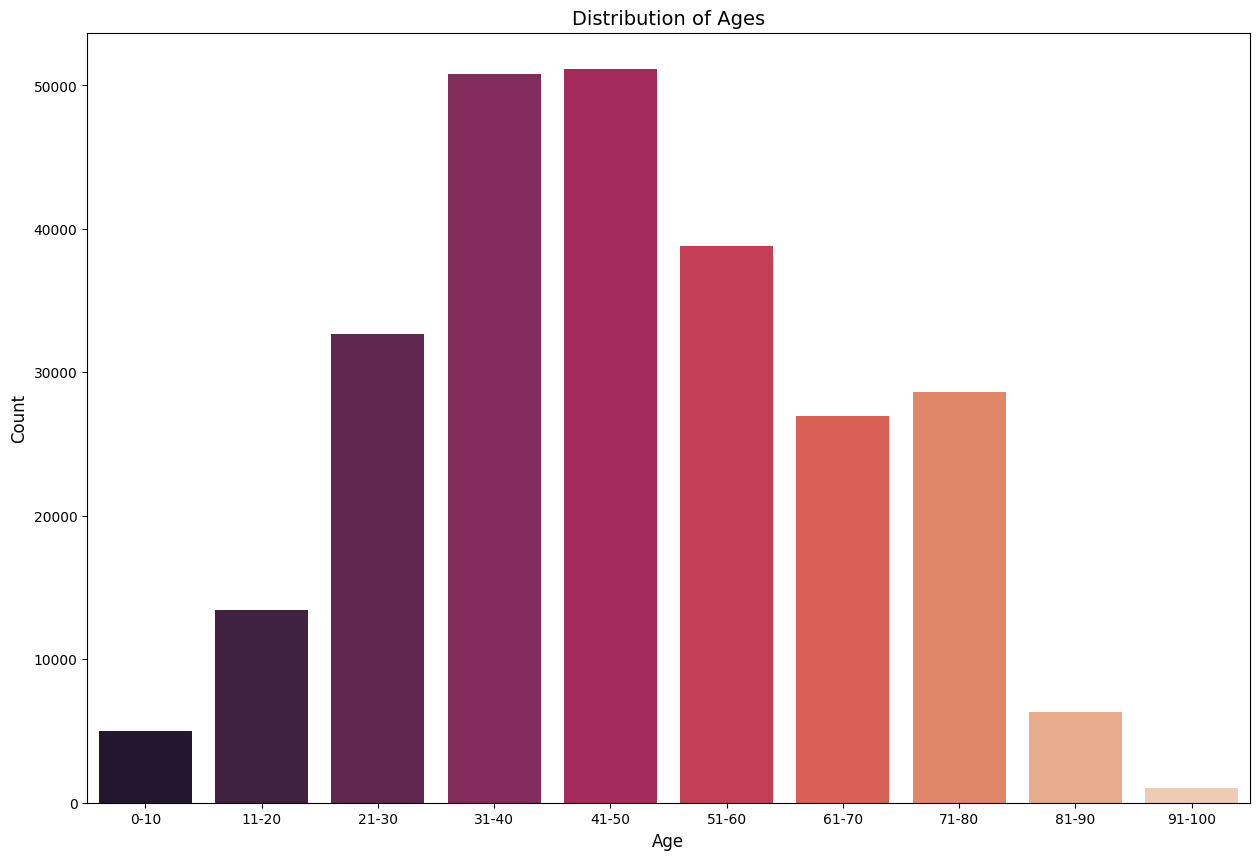

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the count plot
sns.countplot(x=x_train['Age'].sort_values(), data=x_train, palette='rocket')

# Set the axis labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set the title
plt.title('Distribution of Ages', fontsize=14)

# Show the plot
plt.show()

<ipython-input-17-ef0af6ddcff8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train.sort_values(), data=x_train, palette='mako')


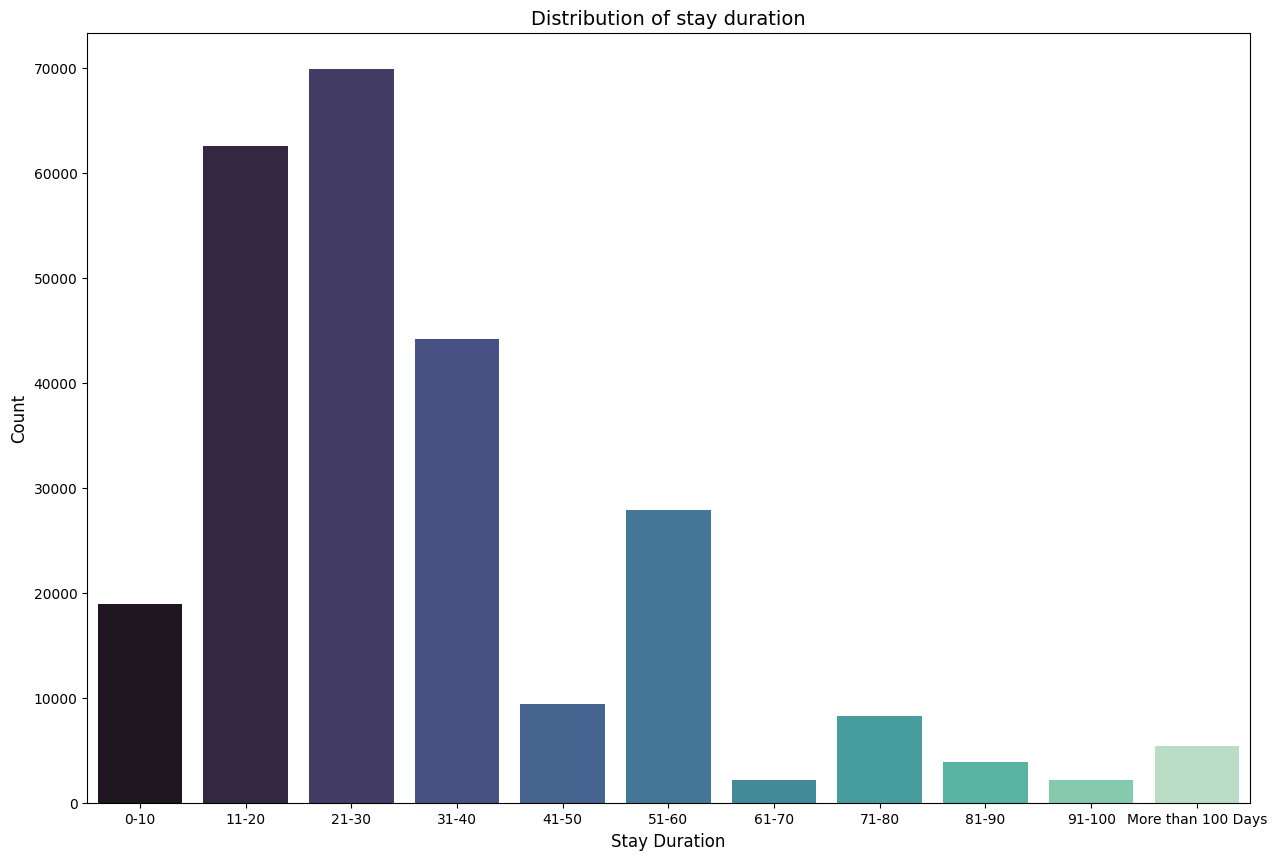

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the count plot
sns.countplot(x=y_train.sort_values(), data=x_train, palette='mako')

# Set the axis labels
plt.xlabel('Stay Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set the title
plt.title('Distribution of stay duration', fontsize=14)

# Show the plot
plt.show()

<ipython-input-18-156d9de471fa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_train['Type of Admission'].sort_values(), data=x_train, palette='rocket')


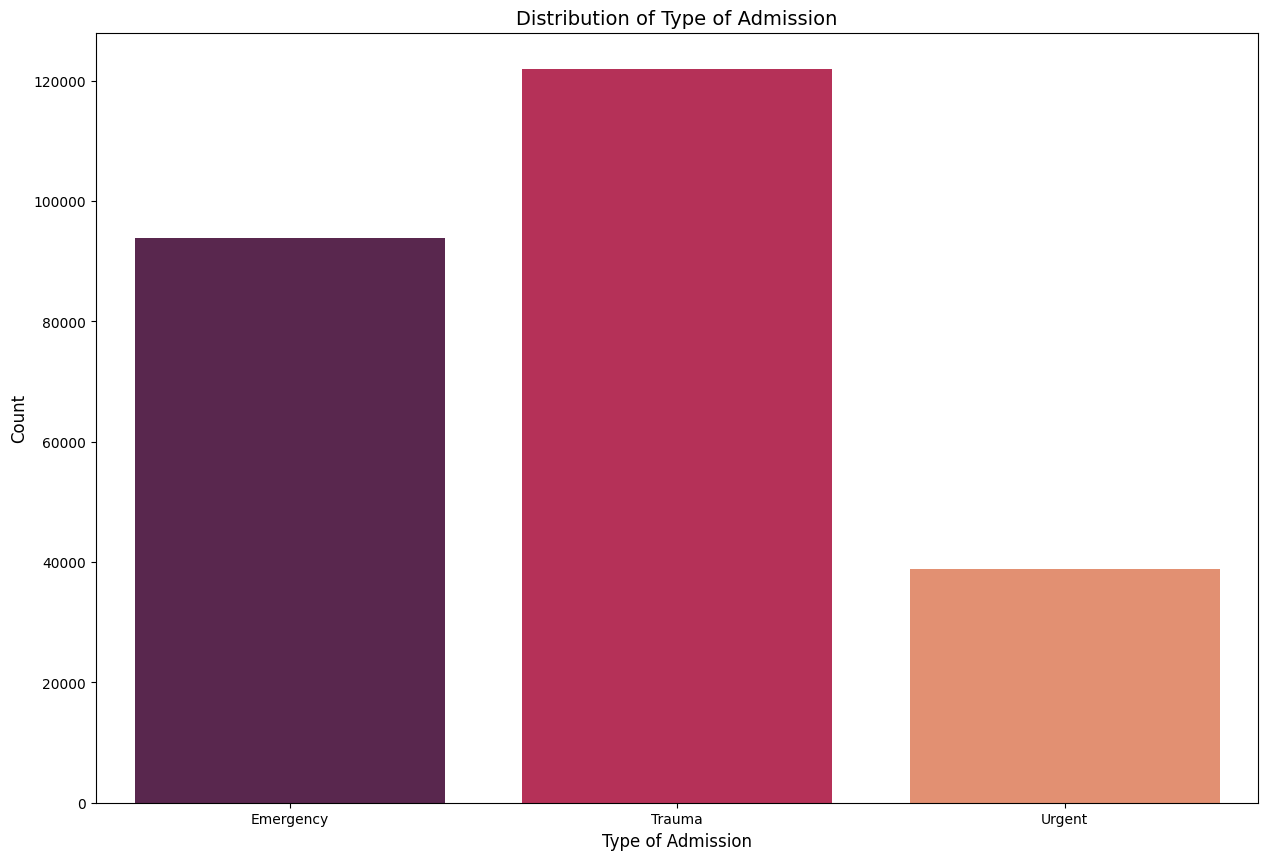

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the count plot
sns.countplot(x=x_train['Type of Admission'].sort_values(), data=x_train, palette='rocket')

# Set the axis labels
plt.xlabel('Type of Admission', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set the title
plt.title('Distribution of Type of Admission', fontsize=14)

# Show the plot
plt.show()

<ipython-input-19-6528cded9136>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_train['Severity of Illness'].sort_values(), data=x_train, palette='crest')


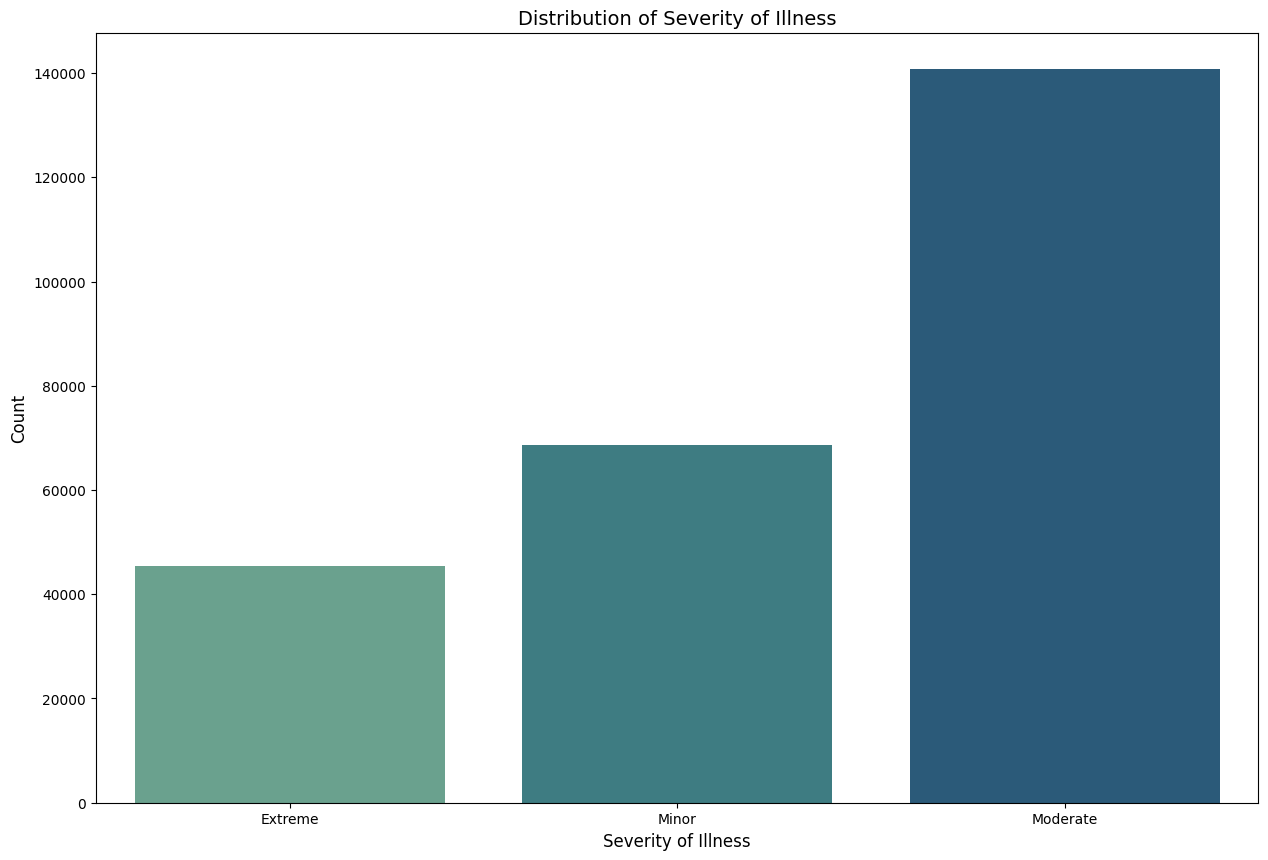

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the count plot
sns.countplot(x=x_train['Severity of Illness'].sort_values(), data=x_train, palette='crest')

# Set the axis labels
plt.xlabel('Severity of Illness', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set the title
plt.title('Distribution of Severity of Illness', fontsize=14)

# Show the plot
plt.show()

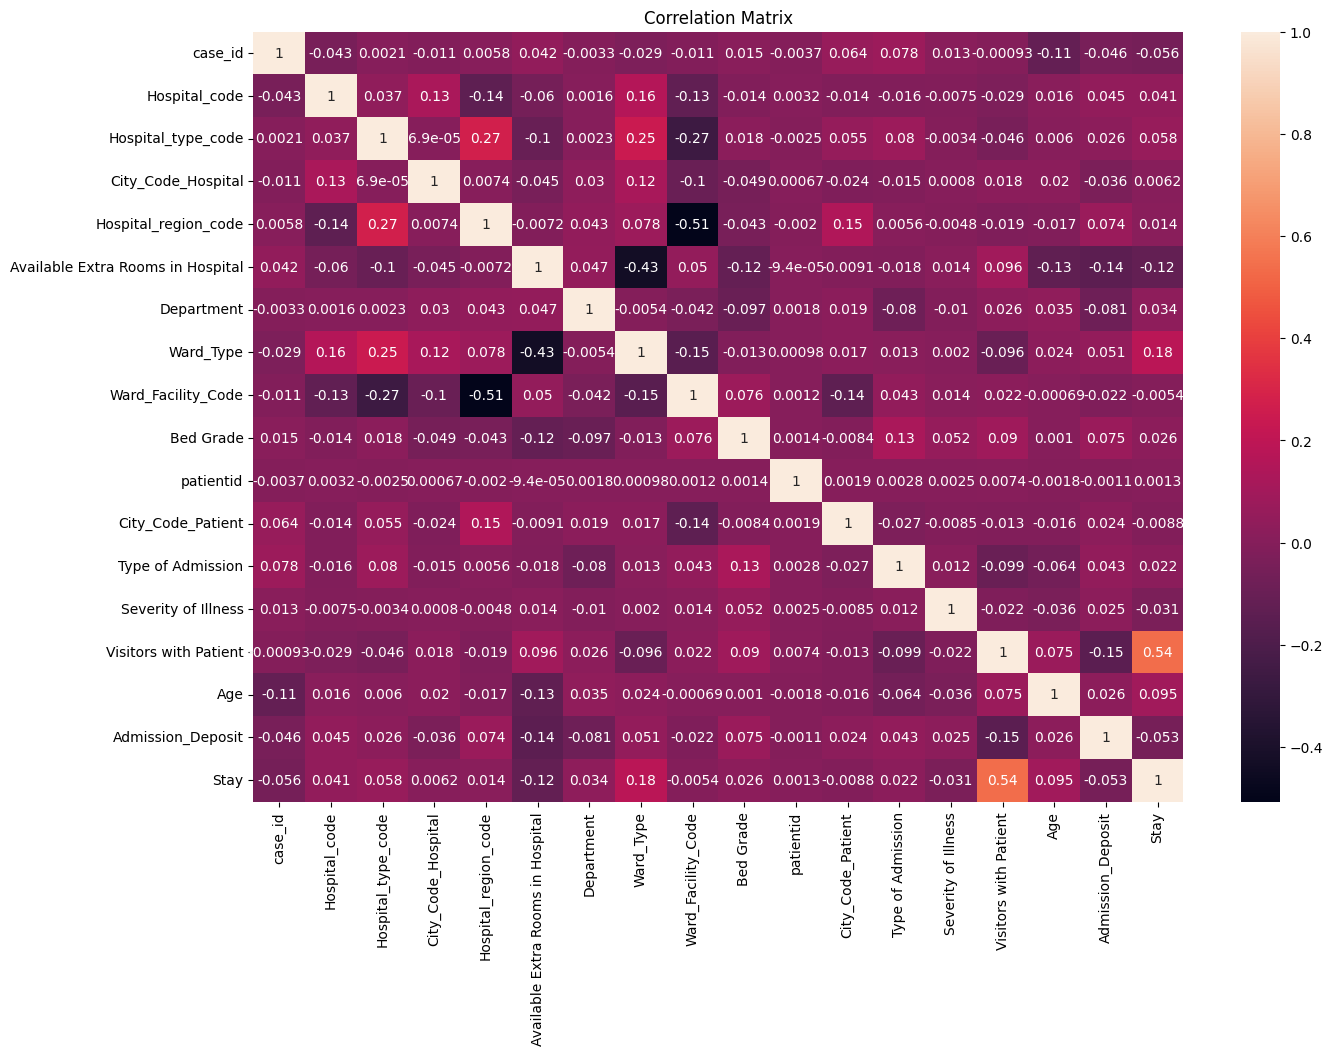

In [20]:
# Check Correlation
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns  # Assuming you're using seaborn for heatmaps
df_corr = pd.concat([x_train, y_train], axis=1)

categorical_features  = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission',
                         'Severity of Illness','Age','Stay']
ordinal = OrdinalEncoder()
df_corr[categorical_features] = ordinal.fit_transform(df_corr[categorical_features])

correlation_matrix = df_corr.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,cmap='rocket')
plt.title('Correlation Matrix')
plt.show()

**Feature Engineering**

Change data to appropriate form

In [21]:
x_train['Age'] = x_train['Age'].astype(str)
y_train = y_train.astype(str)
x_test['Age'] = x_test['Age'].astype(str)
y_test = y_test.astype(str)

Drop noise features

In [22]:
# Drop two columns: 'col2' and 'col4'
x_train = x_train.drop(['case_id', 'patientid','City_Code_Hospital','Ward_Facility_Code','City_Code_Patient'], axis=1)
x_test = x_test.drop(['case_id', 'patientid','City_Code_Hospital','Ward_Facility_Code','City_Code_Patient'], axis=1)

Fill missing value, Scale Nummerical Columns, Encode Categorical Columns

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline

categorical_features  = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Type of Admission','Severity of Illness','Age']

numerical_features = ['Hospital_code','Available Extra Rooms in Hospital','Bed Grade','Visitors with Patient','Admission_Deposit']

def preprocess_data(X_train, X_test, numerical_features, categorical_features):
  """
  Preprocesses the training and test data.

  Args:
      X_train: Training data.
      X_test: Test data.
      numerical_features: List of numerical feature names.
      categorical_features: List of categorical feature names.

  Returns:
      Tuple: Transformed X_train and X_test.
  """

  # Define pipelines for numerical and categorical features
  numerical_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())
  ])

  categorical_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
  ])

  # Create the main preprocessor
  preprocessor = ColumnTransformer([
      ('num', numerical_pipeline, numerical_features),
      ('cat', categorical_pipeline, categorical_features)
  ], remainder='passthrough')

  # Fit the preprocessor on the training data
  preprocessor.fit(X_train)

  # Transform both training and test data
  X_train_processed = preprocessor.transform(X_train)
  X_test_processed = preprocessor.transform(X_test)  # Use X_test here

  return X_train_processed, X_test_processed


# Preprocess the data (assuming x_train and X_test are your actual data)
x_train, x_test = preprocess_data(x_train, x_test, numerical_features, categorical_features)

Oversampling

In [24]:
y_train_series = pd.Series(y_train)
print("\nClass Distribution After Undersampling:")
print(y_train_series.value_counts(normalize=True) * 100)


Class Distribution After Undersampling:
Stay
21-30                 27.433955
11-20                 24.564475
31-40                 17.341708
51-60                 10.947988
0-10                   7.424926
41-50                  3.684396
71-80                  3.227870
More than 100 Days     2.116585
81-90                  1.529735
91-100                 0.868695
61-70                  0.859666
Name: proportion, dtype: float64


In [25]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)
x_train = x_resampled
y_train = y_resampled

y_resampled_series = pd.Series(y_resampled)
print("\nClass Distribution After Undersampling:")
print(y_resampled_series.value_counts(normalize=True) * 100)


Class Distribution After Undersampling:
Stay
21-30                 9.090909
More than 100 Days    9.090909
11-20                 9.090909
61-70                 9.090909
51-60                 9.090909
31-40                 9.090909
0-10                  9.090909
71-80                 9.090909
41-50                 9.090909
91-100                9.090909
81-90                 9.090909
Name: proportion, dtype: float64


Encode Target Label

In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train contains your target variable

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the label encoder on y_train
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [27]:
# Get the class labels
class_labels = le.classes_
print(class_labels)
# Print the class labels and their corresponding encoded values
for i, label in enumerate(class_labels):
    print(f"Class: {label}, Encoded Label: {i}")

['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100' 'More than 100 Days']
Class: 0-10, Encoded Label: 0
Class: 11-20, Encoded Label: 1
Class: 21-30, Encoded Label: 2
Class: 31-40, Encoded Label: 3
Class: 41-50, Encoded Label: 4
Class: 51-60, Encoded Label: 5
Class: 61-70, Encoded Label: 6
Class: 71-80, Encoded Label: 7
Class: 81-90, Encoded Label: 8
Class: 91-100, Encoded Label: 9
Class: More than 100 Days, Encoded Label: 10


**Modeling**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Logistic regression for classification
model = LogisticRegression(max_iter=10000)

# Fit the model on the training data
model.fit(x_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')  # Use 'accuracy' for classification

# Print the results
print(f"\tK-Fold Cross-Validation Accuracy:", cv_scores)
print('-'*100)
print(f'\tAverage K-Fold Cross-Validation Accuracy: {cv_scores.mean()}')
print('-'*100)

	K-Fold Cross-Validation Accuracy: [0.25394461 0.25660471 0.25957048 0.26009899 0.26074288]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy: 0.25819233430267796
----------------------------------------------------------------------------------------------------


**Model Evaluation**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Logistic regression for classification
model = LogisticRegression(max_iter=10000)

# Fit the model on the training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Or 'micro', 'weighted', None
recall = recall_score(y_test, y_pred, average='macro')  # Or 'micro', 'weighted', None
f1 = f1_score(y_test, y_pred, average='macro')  # Or 'micro', 'weighted', None

# Calculate predicted probabilities (assuming you have a multiclass model)
y_pred_proba = model.predict_proba(x_test)
# Choose between OVO or OVR (based on your preference)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')  # Or 'ovr'

# Print the results
#"Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")

Accuracy: 0.239
Precision: 0.204
Recall: 0.245
F1-score: 0.189
AUC-ROC: 0.734


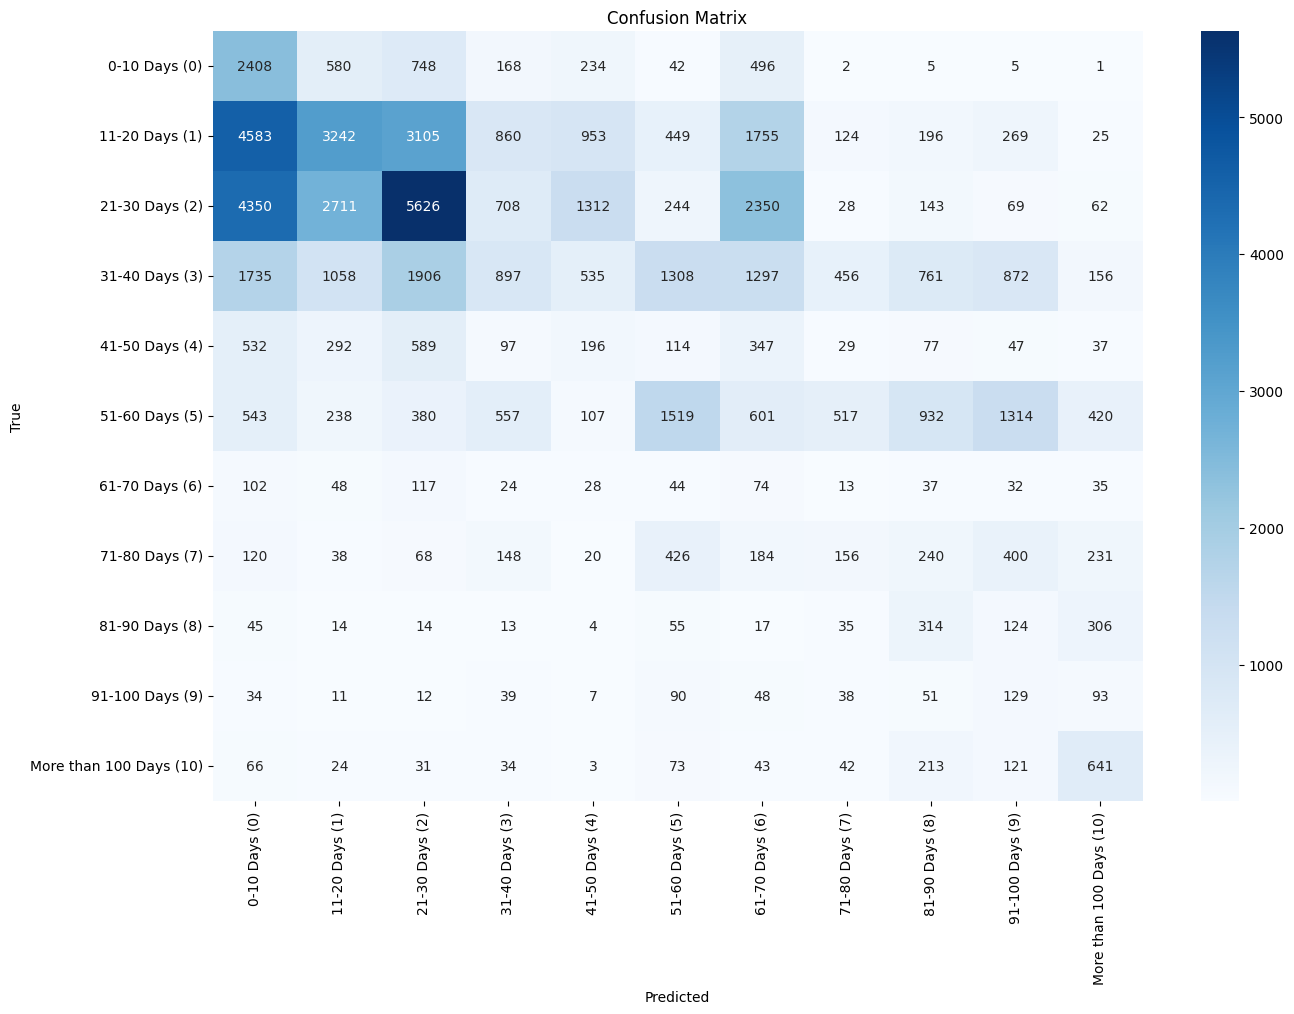

In [31]:
# Define class labels with corresponding encoded values
class_labels = [
    "0-10 Days (0)",
    "11-20 Days (1)",
    "21-30 Days (2)",
    "31-40 Days (3)",
    "41-50 Days (4)",
    "51-60 Days (5)",
    "61-70 Days (6)",
    "71-80 Days (7)",
    "81-90 Days (8)",
    "91-100 Days (9)",
    "More than 100 Days (10)"
]

# Visualize the confusion matrix with class labels
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

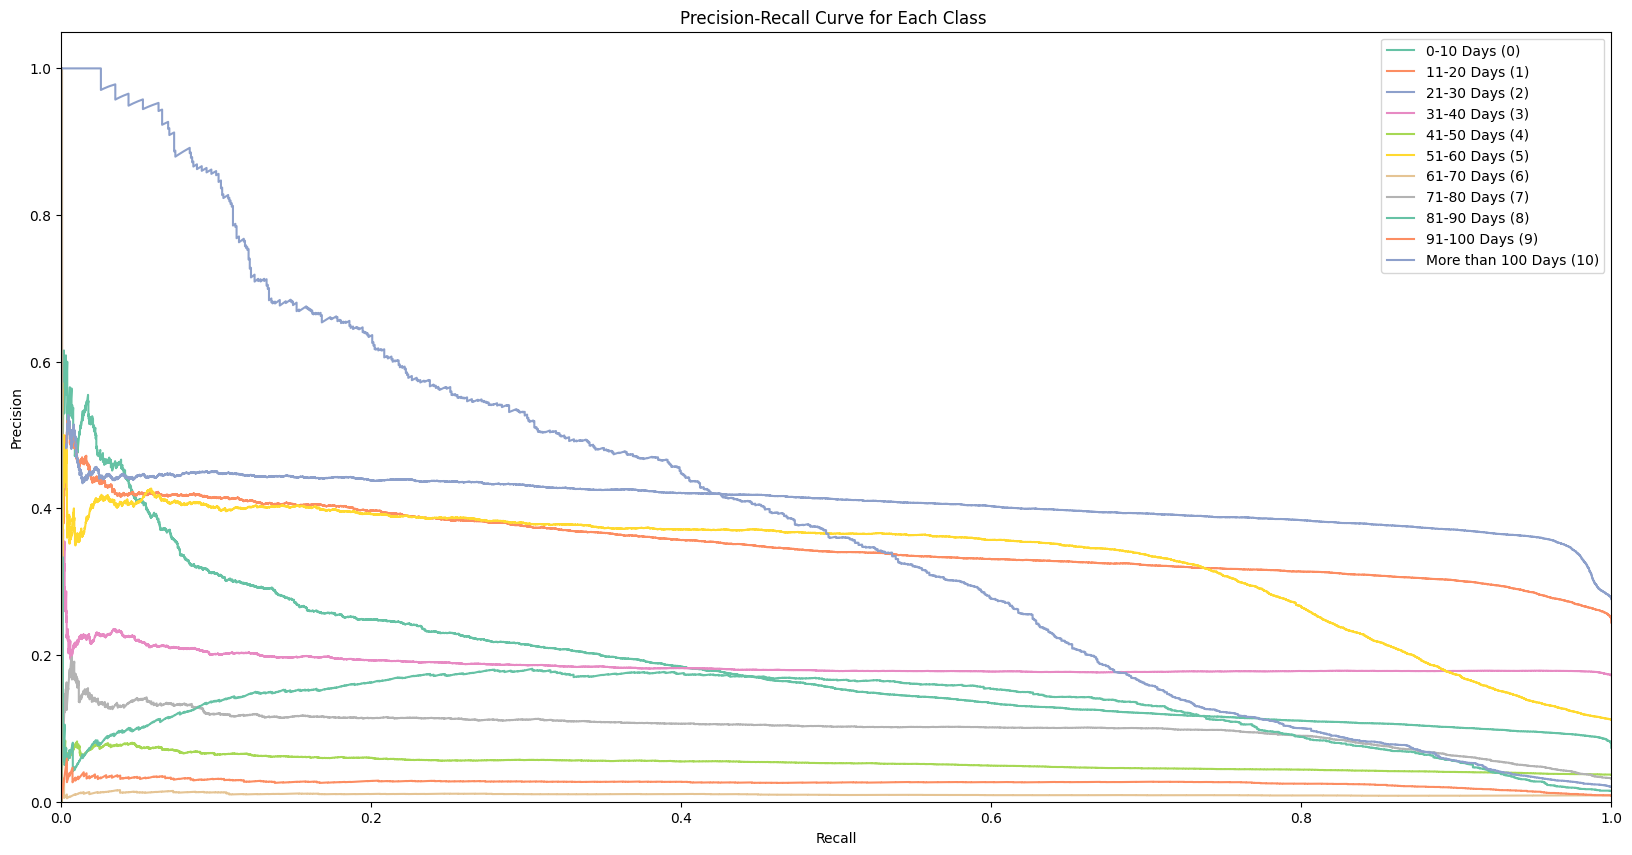

In [32]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
# Define class labels
class_labels = [
    "0-10 Days (0)",
    "11-20 Days (1)",
    "21-30 Days (2)",
    "31-40 Days (3)",
    "41-50 Days (4)",
    "51-60 Days (5)",
    "61-70 Days (6)",
    "71-80 Days (7)",
    "81-90 Days (8)",
    "91-100 Days (9)",
    "More than 100 Days (10)"
]


# Convert true labels to 1D
y_test_labels = y_test.flatten()

# Initialize a plot
plt.figure(figsize=(20, 10))

# Set Seaborn color palette
sns.set_palette("Set2")

# Generate Precision-Recall curve for each class (OvR)
for i, label in enumerate(class_labels):
  # Get the true binary labels for the current class (OvR)
  y_test_bin = np.where(y_test_labels == i, 1, 0)

  # Get the predicted probabilities for the current class
  y_pred_prob = model.predict_proba(x_test)[:, i]

  # Compute Precision-Recall values (OvR)
  precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_prob)

  # Plot the curve
  plt.plot(recall, precision, label=label)

# Add plot details
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class ")
plt.legend(loc="upper right")
plt.ylim([0, 1.05])
plt.xlim([0, 1])

# Show the plot
plt.show()

In [33]:
import warnings
warnings.filterwarnings('ignore')


------------------------------------------------------------------------------------------------------------------------------------------------------
0-10 Days (0) AUC: 0.7237

------------------------------------------------------------------------------------------------------------------------------------------------------
11-20 Days (1) AUC: 0.6603

------------------------------------------------------------------------------------------------------------------------------------------------------
21-30 Days (2) AUC: 0.7006

------------------------------------------------------------------------------------------------------------------------------------------------------
31-40 Days (3) AUC: 0.5249

------------------------------------------------------------------------------------------------------------------------------------------------------
41-50 Days (4) AUC: 0.6034

---------------------------------------------------------------------------------------------------------

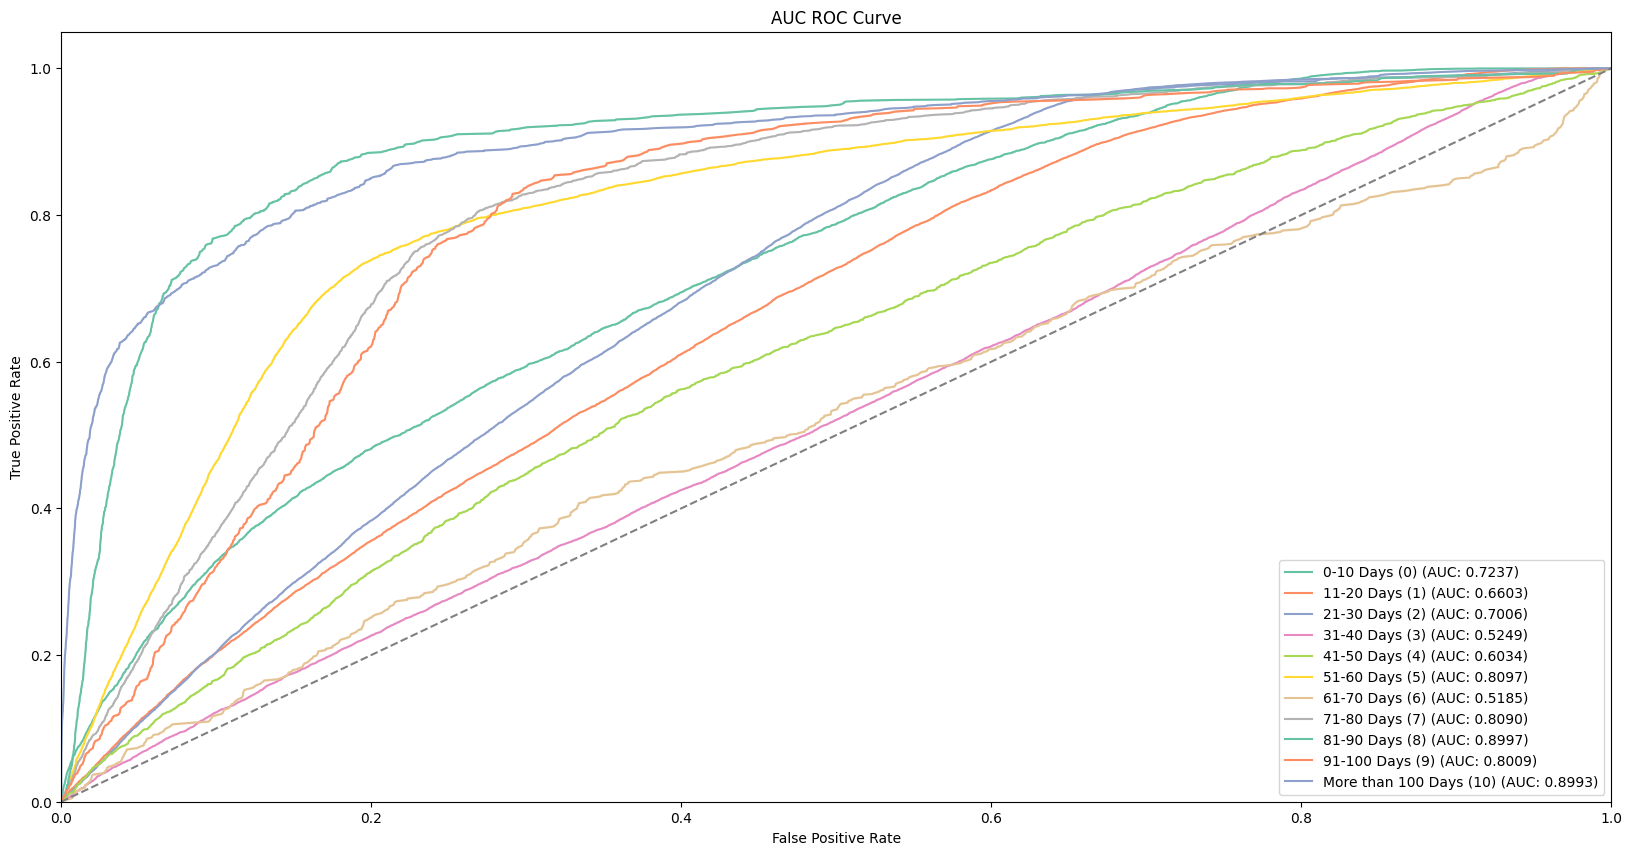

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
y_pred = model.predict_proba(x_test)

# Define class labels
class_labels = [
    "0-10 Days (0)",
    "11-20 Days (1)",
    "21-30 Days (2)",
    "31-40 Days (3)",
    "41-50 Days (4)",
    "51-60 Days (5)",
    "61-70 Days (6)",
    "71-80 Days (7)",
    "81-90 Days (8)",
    "91-100 Days (9)",
    "More than 100 Days (10)"
]
# Binarize the true labels for multi-class (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10])

# Initialize ROC curve and AUC dictionaries
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class and calculate the ROC curve and AUC score
for i, class_label in enumerate(class_labels):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a new figure using Seaborn
plt.figure(figsize=(20, 10))

# Set Seaborn color palette"
sns.set_palette("Set2")

# Plot ROC curve for each class
for i, class_label in enumerate(class_labels):
    sns.lineplot(x=fpr[i], y=tpr[i], label=f'{class_label} (AUC: {roc_auc[i]:.4f})')

# Plot the random guessing line (optional)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')
plt.legend(loc="lower right")

# Show AUC values for each class
for i, class_label in enumerate(class_labels):
    print()
    print('-'*150)
    print(f"{class_label} AUC: {roc_auc[i]:.4f}")
# Display the plot
print()
print('-'*150)
plt.show()